In [1]:
 # Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

In [2]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
# File to Load
mouse_drug_data_to_load = "02-Homework_05-Matplotlib_Instructions_Pymaceuticals_data_mouse_drug_data.csv"
clinical_trial_data_to_load = "02-Homework_05-Matplotlib_Instructions_Pymaceuticals_data_clinicaltrial_data.csv"

In [4]:
# Read Data Files and store into Pandas Data Frames
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)
print(mouse_data.columns)
print(clinical_data.columns)


Index(['Mouse ID', 'Drug'], dtype='object')
Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


In [5]:
# Combine the data into a single dataset
data_complete = pd.merge(clinical_data, mouse_data, how="left", on=["Mouse ID", "Mouse ID"])

data_complete.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

mean_tumor_volume = data_complete.groupby(['Drug','Timepoint']).agg({'Tumor Volume (mm3)': 'mean'})
drug_tumor = mean_tumor_volume.reset_index()
drug_tumor

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
group_standard_error = data_complete.groupby(['Drug','Timepoint']).agg({'Tumor Volume (mm3)': 'sem'})
group_standard_error = group_standard_error.reset_index()
group_standard_error.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [8]:
# Minor Data Munging to Re-Format the Data Frames
reformatted_drug_tumor = drug_tumor.copy()
reformatted_drug_tumor = reformatted_drug_tumor.set_index('Timepoint')
reformatted_drug_tumor = reformatted_drug_tumor.pivot(index=reformatted_drug_tumor.index, columns='Drug')['Tumor Volume (mm3)']

#Reduce to 4 pertinent drugs: Capomulin, Infubinol, Ketapril, and Placebo
reformatted_drug_tumor = reformatted_drug_tumor[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
reformatted_drug_tumor.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


In [9]:
# Minor Data Munging to Re-Format the Data Frames
reformatted_drug_standard_error = group_standard_error.copy()
reformatted_drug_standard_error = reformatted_drug_standard_error.set_index('Timepoint')
reformatted_drug_standard_error = reformatted_drug_standard_error.pivot(index=reformatted_drug_standard_error.index, columns='Drug')['Tumor Volume (mm3)']

#Reduce to 4 pertinent drugs: Capomulin, Infubinol, Ketapril, and Placebo
reformatted_drug_standard_error = reformatted_drug_standard_error[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
reformatted_drug_standard_error.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609


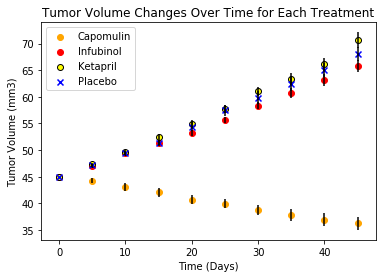

In [16]:
timepoints = reformatted_drug_tumor.index
plt.scatter(timepoints, reformatted_drug_tumor['Capomulin'], marker="o", facecolors="orange", edgecolors="orange", label="Capomulin")
plt.errorbar(timepoints, reformatted_drug_tumor['Capomulin'], reformatted_drug_standard_error['Capomulin'], fmt='none', ecolor='black',label=None)

plt.scatter(timepoints, reformatted_drug_tumor['Infubinol'], marker="o", facecolors="red", edgecolors="red",label="Infubinol")
plt.errorbar(timepoints, reformatted_drug_tumor['Infubinol'], reformatted_drug_standard_error['Infubinol'], fmt='none', ecolor='black',label=None)


plt.scatter(timepoints, reformatted_drug_tumor['Ketapril'], marker="o", facecolors="yellow", edgecolors="black",label="Ketapril")
plt.errorbar(timepoints, reformatted_drug_tumor['Ketapril'], reformatted_drug_standard_error['Ketapril'], fmt='none', ecolor='black',label=None)


plt.scatter(timepoints, reformatted_drug_tumor['Placebo'], marker="x", facecolors="blue",label="Placebo")
plt.errorbar(timepoints, reformatted_drug_tumor['Placebo'], reformatted_drug_standard_error['Placebo'], fmt='none', ecolor='black',label=None)


plt.legend()
plt.title('Tumor Volume Changes Over Time for Each Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig("../Pymaceuticals/Tumor-Volume-Changes-Over-Time-for-Each-Treatment.png")
plt.show()

In [12]:
#  Metastatic Response to Treatment
metatastic_response = data_complete.groupby(['Drug', 'Timepoint']).agg({'Metastatic Sites' : 'mean'}).reset_index()
metatastic_response = metatastic_response.set_index('Timepoint')
metatastic_response = metatastic_response.pivot(index=metatastic_response.index, columns='Drug')['Metastatic Sites']
metatastic_response = metatastic_response[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
metatastic_response.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


In [14]:
metatastic_response_standard_error = data_complete.groupby(['Drug', 'Timepoint']).agg({'Metastatic Sites' : 'sem'}).reset_index()
metatastic_response_standard_error = metatastic_response_standard_error.set_index('Timepoint')
metatastic_response_standard_error = metatastic_response_standard_error.pivot(index=metatastic_response_standard_error.index, columns='Drug')['Metastatic Sites']
metatastic_response_standard_error = metatastic_response_standard_error[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
metatastic_response_standard_error.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064


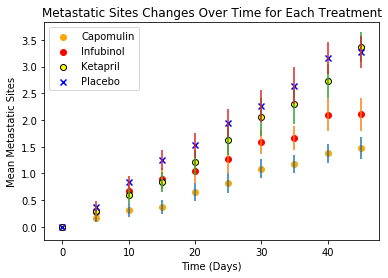

In [18]:
timepoints = metatastic_response.index

# Adding label=None removes the errorbar from the legend
plt.scatter(timepoints, metatastic_response['Capomulin'], marker="o", facecolors="orange", edgecolors="orange", label="Capomulin")
plt.errorbar(timepoints, metatastic_response['Capomulin'], metatastic_response_standard_error['Capomulin'], fmt='none', label=None)

plt.scatter(timepoints, metatastic_response['Infubinol'], marker="o", facecolors="red", edgecolors="red", label="Infubinol")
plt.errorbar(timepoints, metatastic_response['Infubinol'], metatastic_response_standard_error['Infubinol'], fmt='none', label=None)

plt.scatter(timepoints, metatastic_response['Ketapril'], marker="o", facecolors="yellow", edgecolors="black", label="Ketapril")
plt.errorbar(timepoints, metatastic_response['Ketapril'], metatastic_response_standard_error['Ketapril'], fmt='none', label=None)

plt.scatter(timepoints, metatastic_response['Placebo'], marker="x", facecolors="blue", label="Placebo")
plt.errorbar(timepoints, metatastic_response['Placebo'], metatastic_response_standard_error['Placebo'], fmt='none', label=None)

plt.legend()

plt.title('Metastatic Sites Changes Over Time for Each Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Mean Metastatic Sites')
plt.savefig("../Pymaceuticals/Metastatic-Sites-Changes-Over-Time-for-Each-Treatment.png")
plt.show()


In [19]:
# Survival Rates of Mice
mice_counts = data_complete.groupby(['Drug', 'Timepoint']).agg({'Mouse ID' : 'count'}).reset_index()
mice_counts = mice_counts.set_index('Timepoint')
mice_counts = mice_counts.pivot(index=mice_counts.index, columns='Drug')['Mouse ID']
mice_counts = mice_counts[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
mice_counts.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19


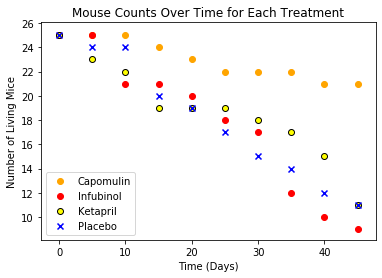

In [20]:
timepoints = mice_counts.index

plt.scatter(timepoints, mice_counts['Capomulin'], marker="o", facecolors="orange", edgecolors="orange", label="Capomulin")
plt.scatter(timepoints, mice_counts['Infubinol'], marker="o", facecolors="red", edgecolors="red", label="Infubinol")
plt.scatter(timepoints, mice_counts['Ketapril'], marker="o", facecolors="yellow", edgecolors="black", label="Ketapril")
plt.scatter(timepoints, mice_counts['Placebo'], marker="x", facecolors="blue", label="Placebo")

plt.legend()

plt.title('Mouse Counts Over Time for Each Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Number of Living Mice')
plt.savefig("../Pymaceuticals/Mouse-Counts-Changes-Over-Time-for-Each-Treatment.png")
plt.show()